In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Exercise 1

In [2]:
Lambda = [[0, 2/5, 1/5, 0, 0],
          [0, 0, 3/4, 1/4, 0],
          [1/2, 0, 0, 1/2, 0],
          [0, 0, 1/3, 0, 2/3],
          [0, 1/3, 0, 1/3, 0]]

In [3]:
w = np.sum(Lambda, axis=1)
w_star = np.max(w)

w = np.sum(Lambda, axis=1)
w_star = np.max(w)
# compute the off-diagonal part of Q
Q = Lambda/w_star 
# add the diagonal part
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

# compute dominant eigenvector
values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

nstates = len(pi_bar)

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


In [4]:
nstates = len(pi_bar)

In [5]:
expected_return_time = 1/(w[1]*pi_bar[1])
expected_return_time

6.750000000000005

In [6]:
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

Average return-time: 6.494914005596298


Text(0.5, 1.0, 'Trajectory for the first 20 jumps')

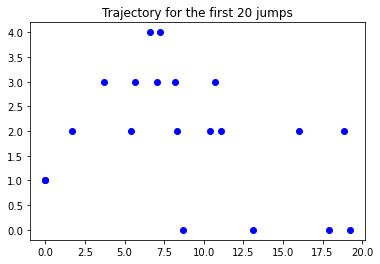

In [7]:
#1.a

# set the number of steps in the simulation
n_steps = 1000

# pos will keep trace of the visited states
pos = np.zeros(n_steps, dtype=int)
# we start from node a
pos[0] = 1
# transition_times will store the time instants at which
# jumps/transitions happen
transition_times = np.zeros(n_steps)

t_next = -np.log(np.random.rand())/w[1]

sum_t_next=0
list_sums=[]
for i in range(1,n_steps):

    
    pos[i] = np.random.choice(nstates, p=P[pos[i-1],:])
    if pos[i]!=1:
        transition_times[i] = transition_times[i-1] + t_next
        # compute the waiting time to the next transition
        t_next = -np.log(np.random.rand())/w[pos[i]]
        sum_t_next=sum_t_next+t_next
    else:
        list_sums.append(sum_t_next)
        sum_t_next=0

tot_sum=sum(list_sums)
print("Average return-time:", tot_sum/len(list_sums))


In [8]:
# 1.c

# set the number of steps in the simulation
n_steps = 1000

# pos will keep trace of the visited states
pos = np.zeros(n_steps, dtype=int)
# we start from state 0
pos[0] = 0
# transition_times will store the time instants at which
# jumps/transitions happen
transition_times = np.zeros(n_steps)

t_next = -np.log(np.random.rand())/w[0]

sum_t_next=0
list_sums=[]
for i in range(1,n_steps):
    
    pos[i] = np.random.choice(nstates, p=P[pos[i-1],:])
    if pos[i]!=4:
        transition_times[i] = transition_times[i-1] + t_next
        # compute the waiting time to the next transition
        t_next = -np.log(np.random.rand())/w[pos[i]]
        sum_t_next=sum_t_next+t_next
    else:
        list_sums.append(sum_t_next)
        sum_t_next=0
        
tot_sum=sum(list_sums)
print(tot_sum/len(list_sums))


5.4637655018540245


In [9]:
#1.e

In [10]:
W = [[0, 2/5, 1/5, 0, 0],
     [0, 0, 3/4, 1/4, 0],
     [1/2, 0, 0, 1/2, 0],
     [0, 0, 1/3, 0, 2/3],
     [0, 1/3, 0, 1/3, 0]]


Number of nodes: 5
['o', 'a', 'b', 'c', 'd']


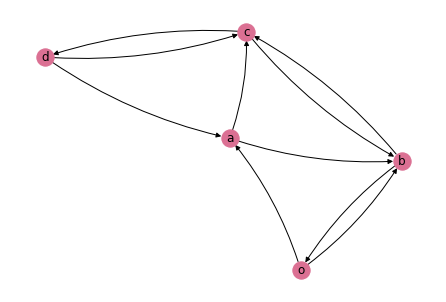

In [11]:
G = nx.DiGraph()
G.add_edges_from([('o','a'),('o','b'),('a','b'),('a','c'),('b','o'),('b','c'),('c','b'), ('c','d'),('d','a'),('d','c')])
nx.draw(G, node_color = 'palevioletred', with_labels = True, connectionstyle='arc3, rad = 0.1')
n_nodes = len(G)
print("Number of nodes:", n_nodes)

plt.savefig('ex1.svg')
print(G.nodes())

In [12]:
G['o']['a']['weigth'] = 2/5
G['o']['b']['weigth'] = 1/5
G['a']['b']['weigth'] = 3/4
G['a']['c']['weigth'] = 1/4
G['b']['o']['weigth'] = 1/2
G['b']['c']['weigth'] = 1/2
G['c']['b']['weigth'] = 1/3
G['c']['d']['weigth'] = 2/3
G['d']['a']['weigth'] = 1/3
G['d']['c']['weigth'] = 1/3

In [13]:
n_nodes = len(G)
print("Number of nodes:", n_nodes)
print(G.nodes())

Number of nodes: 5
['o', 'a', 'b', 'c', 'd']


In [15]:
W = nx.adjacency_matrix(G)
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# define initial condition
x = np.random.uniform(0,1,n_nodes)

for n in range(100):
    x = P @ x
print("x(100):", x)

x(100): [0.79323443 0.79323443 0.79323443 0.79323443 0.79323443]


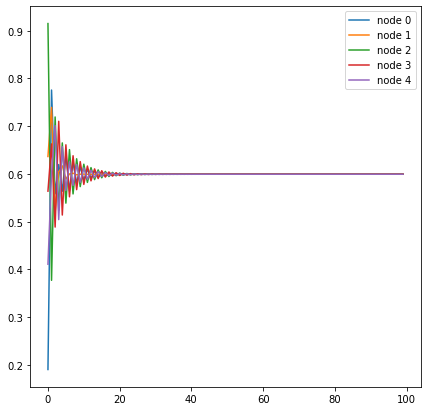

In [17]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(n_nodes):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()
plt.savefig('ex1f.svg')

Number of nodes: 5
['o', 'a', 'b', 'c', 'd']


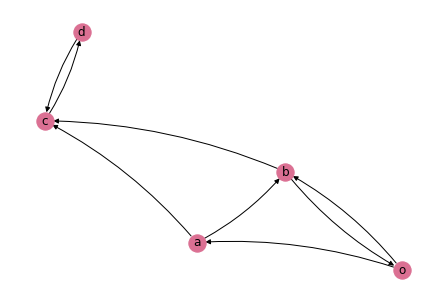

In [18]:
#punto h
F = nx.DiGraph()
F.add_edges_from([('o','a'),('o','b'),('a','b'),('a','c'),('b','o'),('b','c'), ('c','d'),('d','c')])
nx.draw(F, node_color = 'palevioletred', with_labels = True, connectionstyle='arc3, rad = 0.1')
F['o']['a']['weigth'] = 2/5
F['o']['b']['weigth'] = 1/5
F['a']['b']['weigth'] = 3/4
F['a']['c']['weigth'] = 1/4
F['b']['o']['weigth'] = 1/2
F['b']['c']['weigth'] = 1/2
F['c']['d']['weigth'] = 2/3
F['d']['c']['weigth'] = 1/3
n_nodes = len(F)
print("Number of nodes:", n_nodes)


print(F.nodes())
plt.savefig('ex1h1.svg')

In [20]:
W = nx.adjacency_matrix(F)
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# define initial condition
x = np.random.uniform(0,1,n_nodes)

for n in range(100):
    x = P @ x
print("x(100):", x)

x(100): [0.94391216 0.88967624 0.83544031 0.99814809 0.80832234]


Exercise 2